In [126]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
temp_units = "imperial"


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={temp_units}&q="


In [127]:
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)



In [128]:
city_name = []
cloudiness = []
dates = []
humidity = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudiness.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 49:
            count_one = 1
            set_one += 1
            city_name.append(city)
        else:
            count_one += 1
            city_name.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("Complete")


Processing Record 1 of Set 1 | saint-philippe
Processing Record 2 of Set 1 | ahipara
Processing Record 3 of Set 1 | saldanha
Processing Record 4 of Set 1 | souillac
Processing Record 5 of Set 1 | sitka
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | campo gobierno
Processing Record 8 of Set 1 | aklavik
Processing Record 9 of Set 1 | miranda de ebro
Processing Record 10 of Set 1 | kapaa
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | opuwo
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | nantucket
City not found. Skipping...
Processing Record 15 of Set 1 | bubaque
Processing Record 16 of Set 1 | carnarvon
Processing Record 17 of Set 1 | geraldton
Processing Record 18 of Set 1 | tazmalt
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | medea
Processing Record 21 of Set 1 | rikitea
Processing Record 22 of Set 1 | aleppo
Processing Record 23 of Set 1 | bathsheba
Processing Record 24 of Set 

Processing Record 36 of Set 4 | maragogi
Processing Record 37 of Set 4 | cherskiy
Processing Record 38 of Set 4 | chuy
Processing Record 39 of Set 4 | kodiak
Processing Record 40 of Set 4 | port hardy
Processing Record 41 of Set 4 | vitim
Processing Record 42 of Set 4 | manduria
Processing Record 43 of Set 4 | mao
Processing Record 44 of Set 4 | acapulco
Processing Record 45 of Set 4 | yar-sale
Processing Record 46 of Set 4 | rosamorada
Processing Record 47 of Set 4 | zlin
Processing Record 48 of Set 4 | new norfolk
City not found. Skipping...
Processing Record 49 of Set 4 | saint-georges
Processing Record 50 of Set 4 | lavrentiya
Processing Record 1 of Set 5 | gao
Processing Record 2 of Set 5 | haimen
Processing Record 3 of Set 5 | aksarka
Processing Record 4 of Set 5 | tambun
Processing Record 5 of Set 5 | hobyo
Processing Record 6 of Set 5 | cervo
Processing Record 7 of Set 5 | newport
Processing Record 8 of Set 5 | monrovia
Processing Record 9 of Set 5 | huanren
Processing Record 1

City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 23 of Set 8 | marawi
Processing Record 24 of Set 8 | san pedro
Processing Record 25 of Set 8 | gobabis
City not found. Skipping...
Processing Record 26 of Set 8 | new waterford
Processing Record 27 of Set 8 | darhan
Processing Record 28 of Set 8 | bhakkar
Processing Record 29 of Set 8 | okakarara
Processing Record 30 of Set 8 | preetz
Processing Record 31 of Set 8 | punta alta
Processing Record 32 of Set 8 | xining
Processing Record 33 of Set 8 | fairbanks
Processing Record 34 of Set 8 | yarada
Processing Record 35 of Set 8 | poum
City not found. Skipping...
Processing Record 36 of Set 8 | ngunguru
Processing Record 37 of Set 8 | zeya
Processing Record 38 of Set 8 | ilukste
Processing Record 39 of Set 8 | assiniboia
City not found. Skipping...
Processing Record 40 of Set 8 | usakos
Processing Record 41 of Set 8 | shingu
Processing Record 42 of Set 8 | abay
Processing Record 43 of Set 8

In [145]:
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":countries,
    "Date":dates, 
    "Humidity": humidity,
    "Lat":lats, 
    "Lng":lngs, 
    "Max Temp": max_temps,
    "Wind Speed":wind_speeds
}

weather_data = pd.DataFrame(weatherpy_dict)
 
weather_data.count()

City          536
Cloudiness    536
Country       536
Date          536
Humidity      536
Lat           536
Lng           536
Max Temp      536
Wind Speed    536
dtype: int64

In [130]:
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,saint-philippe,100,RE,1579839492,94,-21.36,55.77,78.80,9.17
1,ahipara,0,NZ,1579839492,83,-35.17,173.17,69.73,11.10
2,saldanha,0,ZA,1579839492,82,-33.01,17.94,66.20,6.93
3,souillac,75,MU,1579839492,88,-20.52,57.52,78.80,4.70
4,sitka,90,US,1579839493,93,57.05,-135.33,37.40,6.93


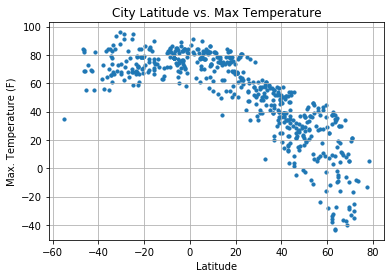

In [131]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure


# Show plot
plt.show()

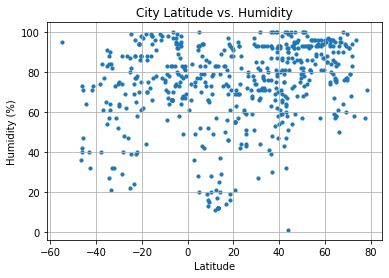

In [132]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure


# Show plot
plt.show()

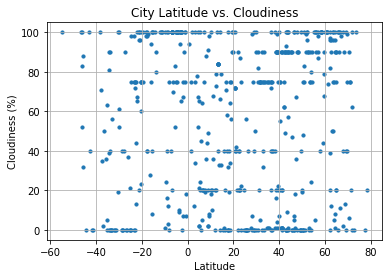

In [133]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

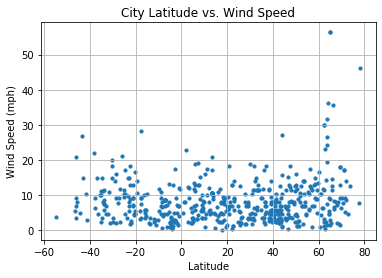

In [134]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

In [135]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_data.loc[weather_data["Lat"] >= 0]
southern_hemisphere = weather_data.loc[weather_data["Lat"] < 0]

Linear Regression: Strong Negative Correlation


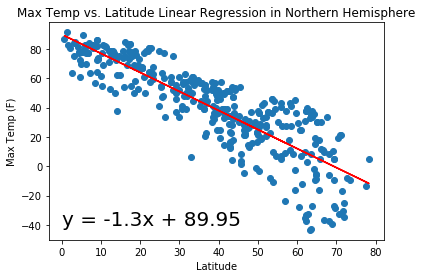

In [136]:
north_lat= northern_hemisphere["Lat"]
north_max= northern_hemisphere["Max Temp"]
#print(f"r-squared:{round(st.pearsonr(north_lat, north_max)[0],2)}")
(slope, intercept, rvalue, pvalue, stderr)= linregress(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

regress_values= northern_hemisphere["Lat"] * slope + intercept
line_eq= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])
plt.title("Max Temp vs. Latitude Linear Regression in Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

plt.plot(northern_hemisphere["Lat"],regress_values,"r-")
plt.annotate(line_eq, (0,-40), fontsize=20, color="black")

print("Linear Regression: Strong Negative Correlation")

Linear Regression: Moderate Correlation


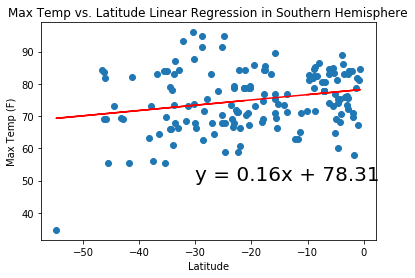

In [137]:
south_lat = southern_hemisphere["Lat"]
south_max = southern_hemisphere["Max Temp"]
#print(f"r-squared: {round(st.pearsonr(south_lat, south_max)[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere["Lat"], southern_hemisphere["Max Temp"])

regress_values = southern_hemisphere["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Max Temp"])
plt.title("Max Temp vs. Latitude Linear Regression in Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

plt.plot(southern_hemisphere["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-30,50),fontsize=20,color="black")

print("Linear Regression: Moderate Correlation")

Linear Regression: Positive Correlation


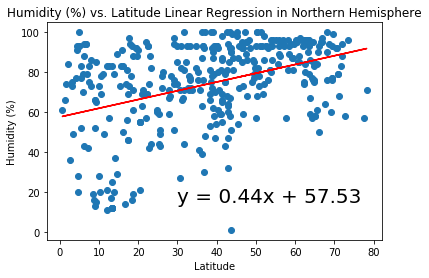

In [138]:
north_humidity = northern_hemisphere["Humidity"]
#print(f"r squared: {round(st.pearsonr(north_lat, north_humidity)[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

regress_values = northern_hemisphere["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])
plt.title("Humidity (%) vs. Latitude Linear Regression in Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.plot(northern_hemisphere["Lat"],regress_values,"r-")
plt.annotate(line_eq,(30,15),fontsize=20,color="black")

print("Linear Regression: Positive Correlation")

Linear Regression: Moderate Correlation


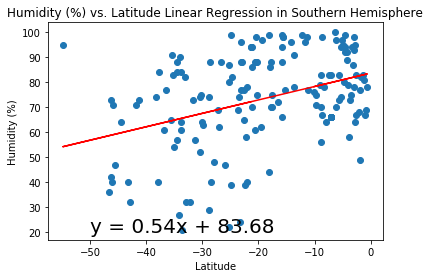

In [139]:
south_humidity = southern_hemisphere["Humidity"]
#print(f"The r-squared is : {round(st.pearsonr(south_lat, south_humidity)[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

regress_values = southern_hemisphere["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])
plt.title("Humidity (%) vs. Latitude Linear Regression in Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.plot(southern_hemisphere["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=20,color="black")

print("Linear Regression: Moderate Correlation")

Linear Regression: No Correlation


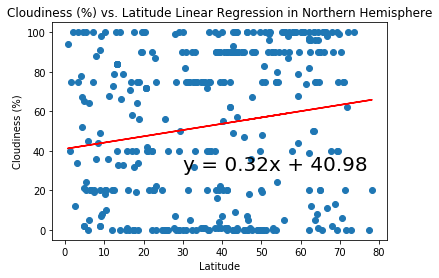

In [140]:
north_cloudiness = northern_hemisphere["Cloudiness"]
#print(f"The r-squared is : {round(st.pearsonr(north_lat, north_cloudiness)[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

regress_values = northern_hemisphere["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])
plt.title("Cloudiness (%) vs. Latitude Linear Regression in Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.plot(northern_hemisphere["Lat"],regress_values,"r-")
plt.annotate(line_eq,(30,30),fontsize=20,color="black")

print("Linear Regression: No Correlation")

Linear Regression: No Correlation


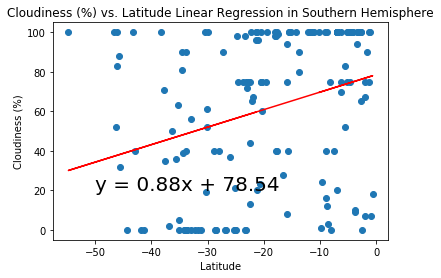

In [141]:
south_cloudiness = southern_hemisphere["Cloudiness"]
#print(f"The r-squared is : {round(st.pearsonr(south_lat, south_cloudiness)[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

regress_values = southern_hemisphere["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])
plt.title("Cloudiness (%) vs. Latitude Linear Regression in Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.plot(southern_hemisphere["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=20,color="black")

print("Linear Regression: No Correlation")

Linear Regression: No Correlation


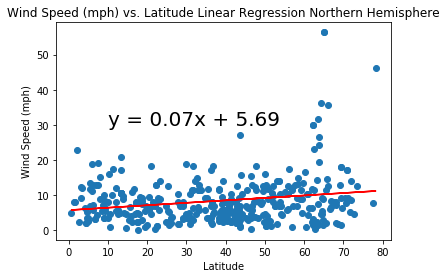

In [142]:
north_wind = northern_hemisphere["Wind Speed"]
#print(f"The r-squared is : {round(st.pearsonr(north_lat, north_wind)[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

regress_values = northern_hemisphere["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])
plt.title("Wind Speed (mph) vs. Latitude Linear Regression Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.plot(northern_hemisphere["Lat"],regress_values,"r-")
plt.annotate(line_eq,(10,30),fontsize=20,color="black")

print("Linear Regression: No Correlation")

Linear Regression: No Correlation


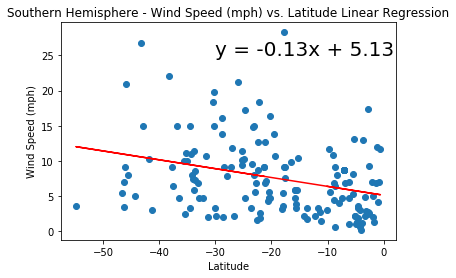

In [143]:
south_wind = southern_hemisphere["Wind Speed"]
#print(f"The r-squared is : {round(st.pearsonr(south_lat, south_wind)[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

regress_values = southern_hemisphere["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.plot(southern_hemisphere["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-30,25),fontsize=20,color="black")

print("Linear Regression: No Correlation")